In [12]:
import pandas as pd
import numpy as np
import glob

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('root')

import datetime as datetime
date = datetime.datetime.now().date()

%load_ext watermark
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas     0.24.2
numpy      1.16.2
matplotlib 3.0.3



In [13]:
# df1 = pd.read_csv('data/2020-09-awair-element_1714-timeseries.csv')
# df2 = pd.read_csv('data/2020-10-awair-element_1714-timeseries.csv')
# df = pd.concat([df1, df2])
df = pd.concat([pd.read_csv(f) for f in glob.glob('data/*.csv')], ignore_index = True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['TEMP'] = df['TEMP'] * 1.8 + 32  # convert °C to °F
df.tail()

,score,VOC,CO2,TEMP,PM25,HUMID
timestamp,,,,,,
2020-09-30 23:35:00,85.366669,329.799988,913.366638,67.083201,0.033333,56.864334
2020-09-30 23:40:00,85.433334,330.133331,908.966675,66.991400,0.000000,56.909332
2020-09-30 23:45:00,85.466667,330.266663,906.966675,66.933200,0.033333,56.938000
2020-09-30 23:50:00,85.766670,329.366669,905.433350,66.947599,0.000000,56.839668
2020-09-30 23:55:00,85.900002,327.566681,906.933350,66.943400,0.033333,56.753334


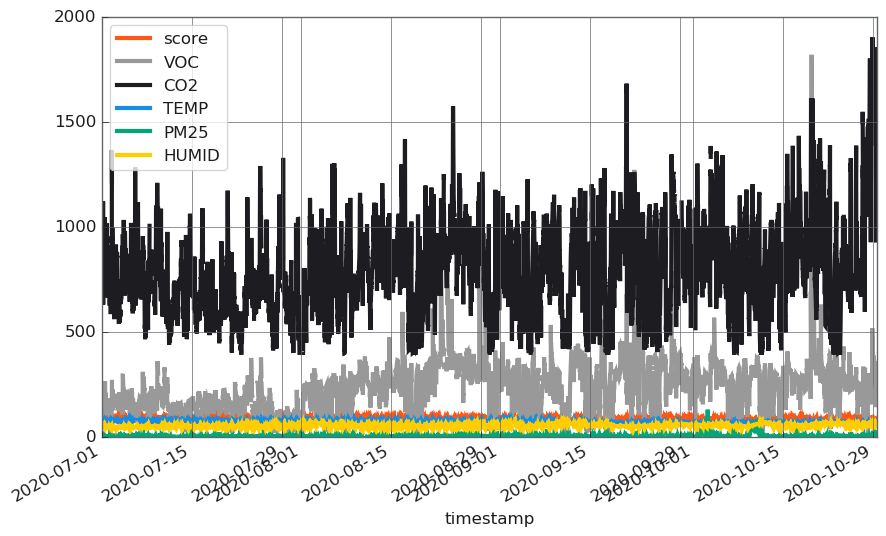

In [14]:
df.loc['2020-07-01':'2020-10-31'].plot()

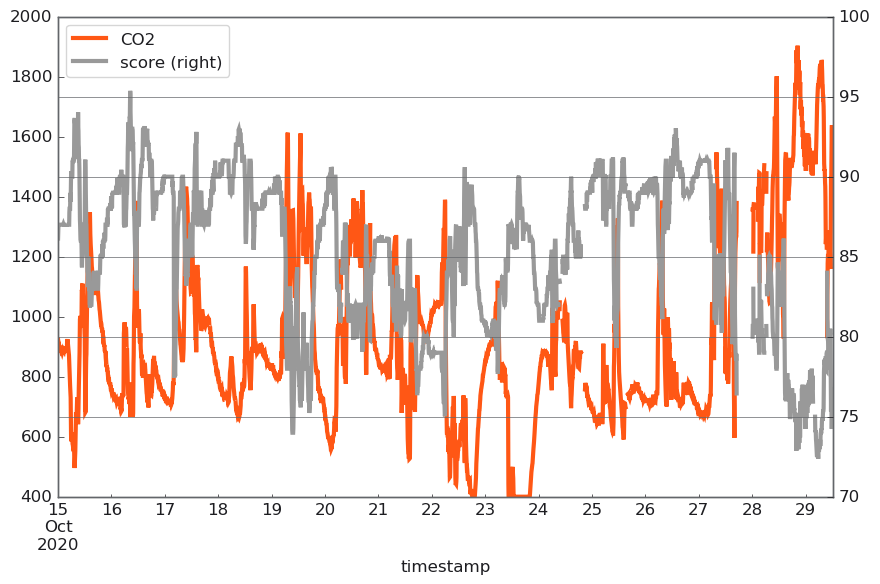

In [15]:
df.loc['2020-10-15':'2020-10-31'].plot(y=['CO2', 'score'], secondary_y=['score'])

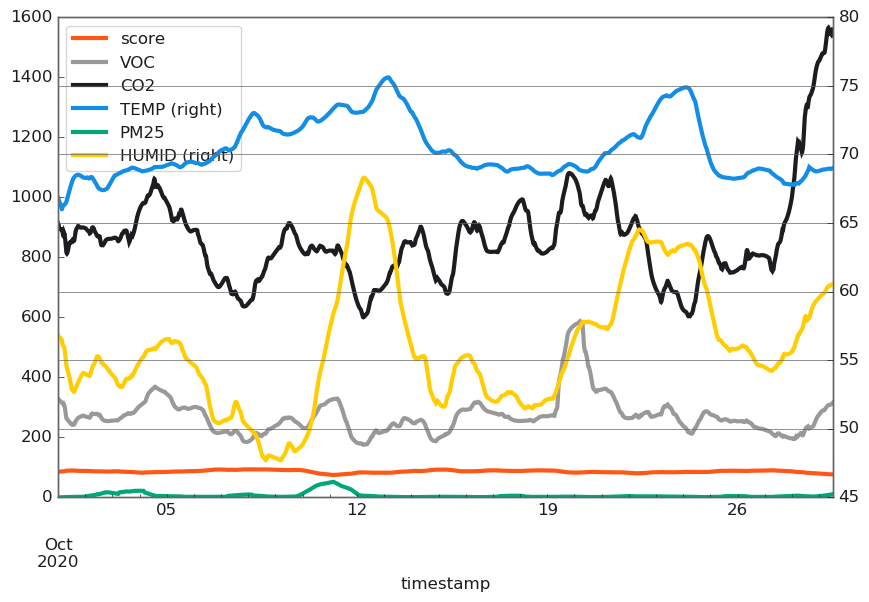

In [17]:
# rolling mean
df.loc['2020-10-01':'2020-10-31'].rolling(window=268*1, min_periods=1).mean().plot(secondary_y=['HUMID','TEMP'])